### 1. Problem Definition

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 

The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount': 
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [ ]:
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

### 2. Data Collection

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('creditcard.csv')

### 3. Exploratory Data Analysis

In [4]:
df.head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### 3.1. Variables

#### 3.1.1. Target Variable

In [7]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [8]:
y = df['Class']

In [9]:
y.describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

#### 3.1.2. Predictor Variables

In [10]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Time']

In [11]:
X = df[features]

In [12]:
X.describe()

V1            V2            V3            V4            V5  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15  9.604066e-16   
std    1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00  1.380247e+00   
min   -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00 -1.137433e+02   
25%   -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01 -6.915971e-01   
50%    1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02 -5.433583e-02   
75%    1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01  6.119264e-01   
max    2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01  3.480167e+01   

                 V6            V7            V8            V9           V10  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15  2.239053e-15   
std    1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00  1.088850e+00   
min   -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01 -2.458826e+01   
25%   -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01 -5.354257e-01   
50%   -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02 -9.291738e-02   
75%    3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01  4.539234e-01   
max    7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01  2.374514e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

                Time  
count  284807.000000  
mean    94813.859575  
std     47488.145955  
min         0.000000  
25%     54201.500000  
50%     84692.000000  
75%    139320.500000  
max    172792.000000  

[8 rows x 30 columns]

Note: There are 30 numerical predictor variables where 'Time' and 'Amount' are the only labelled variables.

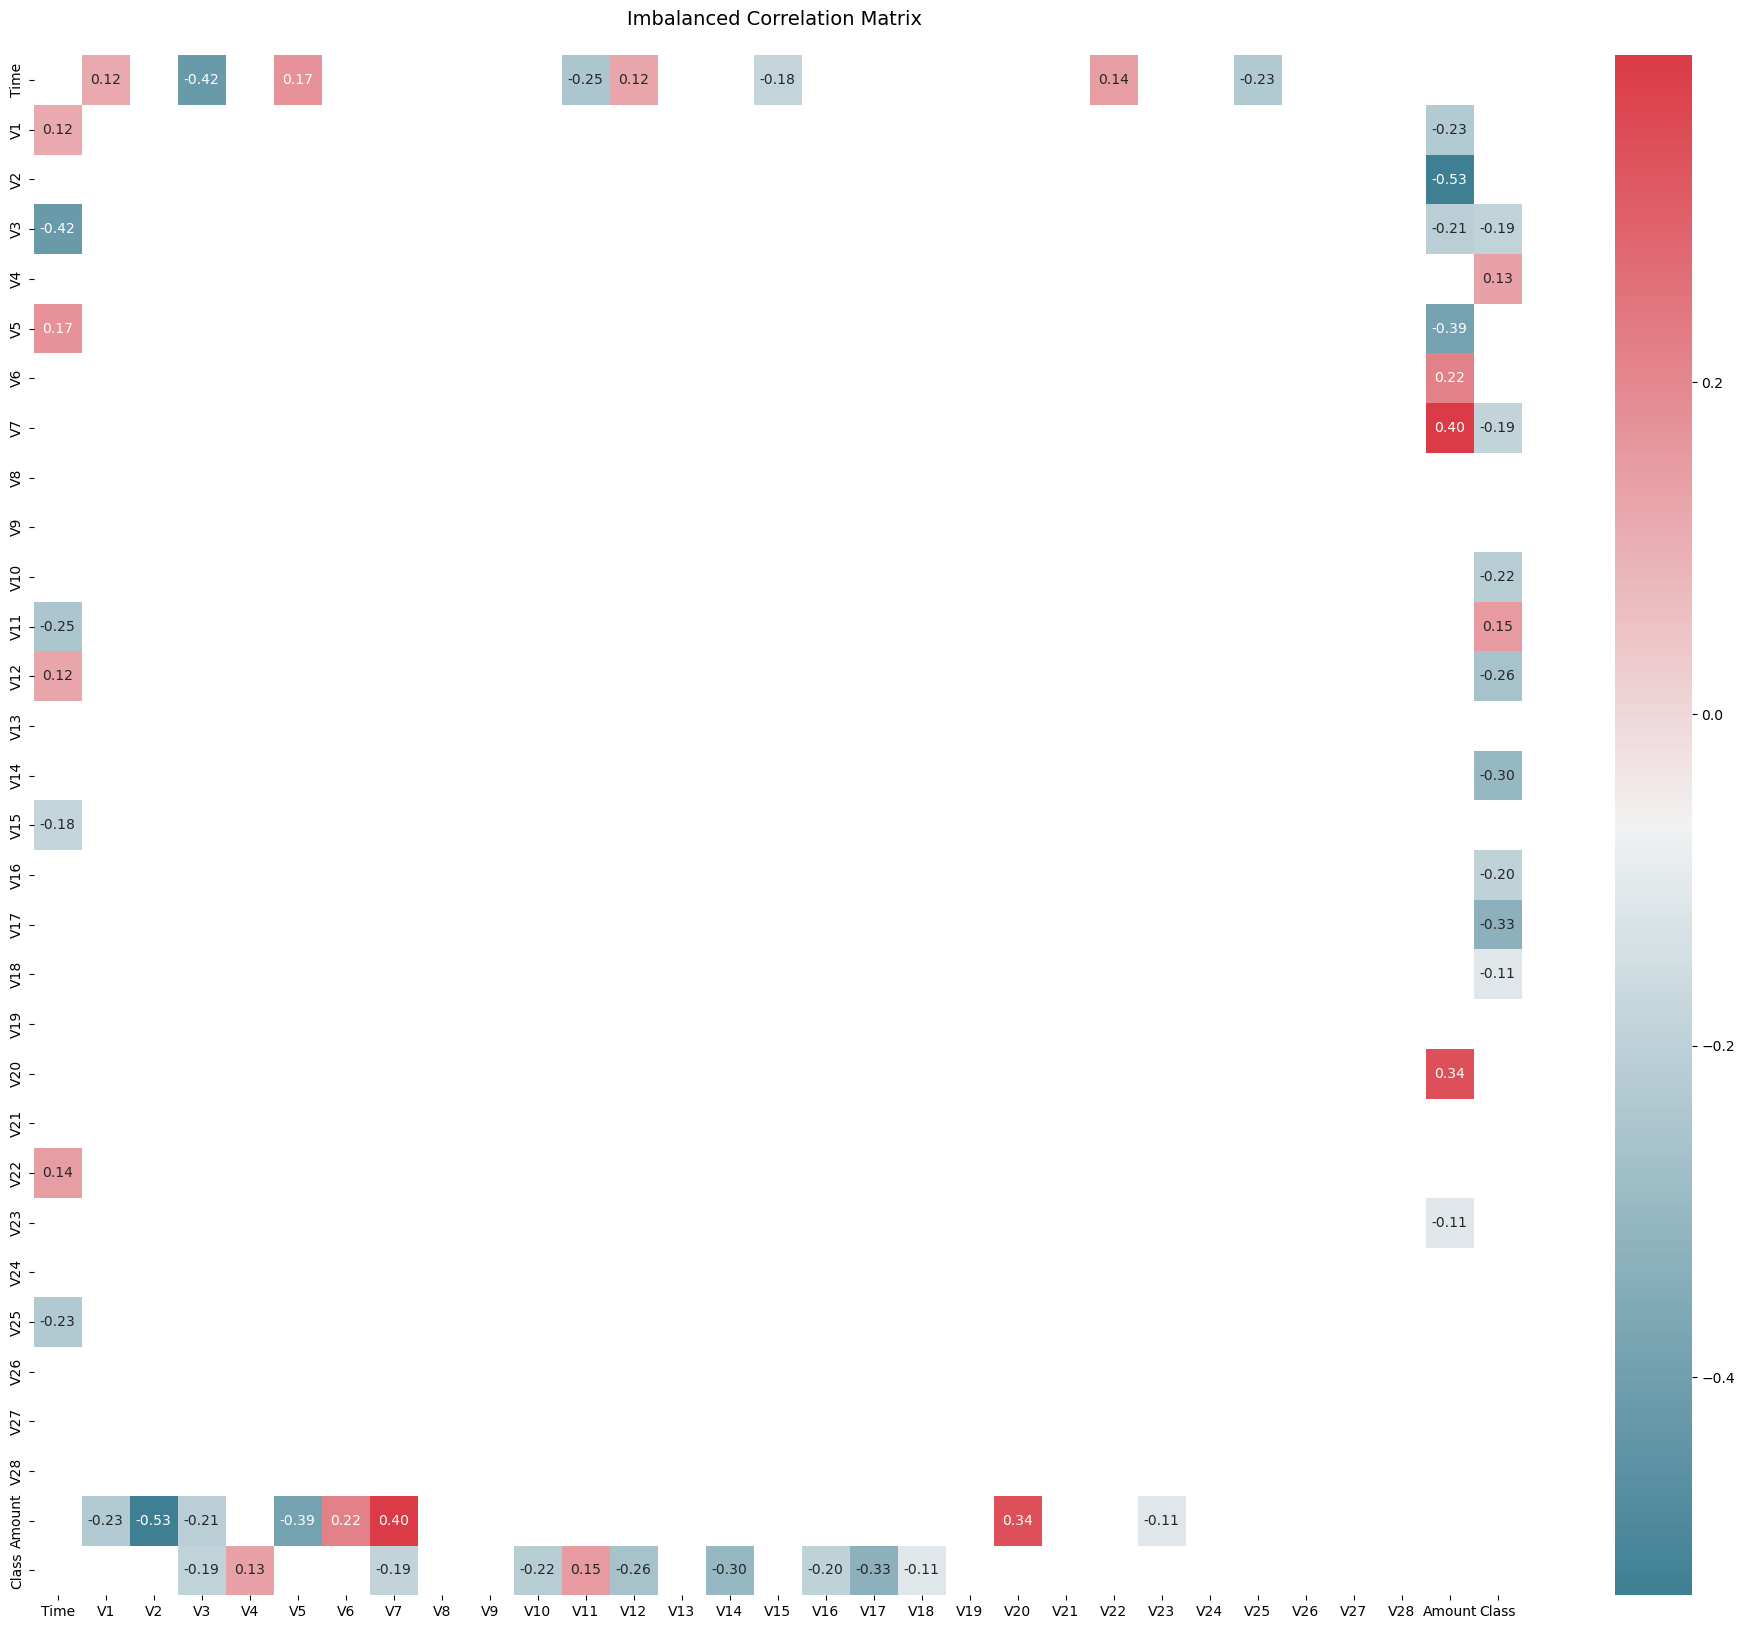

In [13]:
# Make sure we use the subsample in our correlation
f, ax1 = plt.subplots(1, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()

# Set threshold for high correlation (adjust as needed)
threshold = 0.11

# Filter correlation matrix for high correlations
high_corr_matrix = corr[(abs(corr) > threshold) & (corr != 1.0)]

# Set up the color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap without masking
sns.heatmap(high_corr_matrix, cmap=cmap, annot=True, fmt=".2f", ax=ax1)

ax1.set_title("Imbalanced Correlation Matrix \n", fontsize=14)

plt.show()

Substantial correlations to the Class:
- Negative Correlations: V10, V12, V14, and V17 are negatively correlated.
- Positive Correlations: V4 and V11 are positively correlated.

#### 3.2. Detecting Common Data Issues

#### 3.2.1. Missing Values

Handling missing data is crucial, as many machine learning algorithms cannot handle missing values. 

Common approaches include imputation (e.g., mean, median, mode), deletion of rows or columns with missing values, or advanced techniques such as predictive modeling to fill in missing values.

In [14]:
df.isnull().sum().max()

0

Note: There is no missing values.

#### 3.2.2. Skewed Distribution

Features in a dataset often have different scales, which can affect the performance of certain machine learning algorithms. 

Scaling techniques such as standardization (Z-score normalization), min-max scaling, or robust scaling ensure that features are on a similar scale, improving the performance and convergence of algorithms.

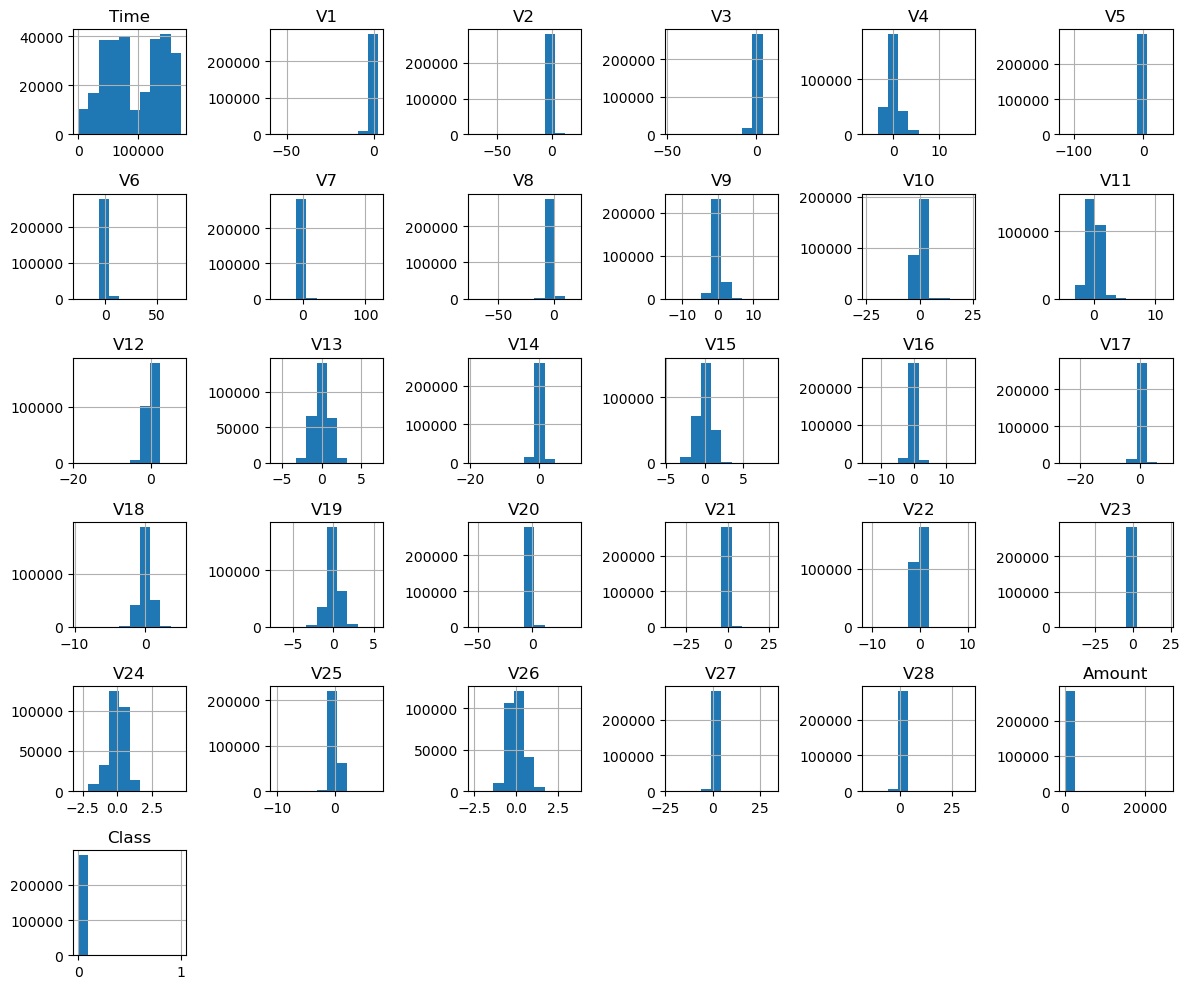

In [15]:
df.hist(figsize=(12, 10))
plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()

Note: The dataframe have a skewed distribution.

#### 3.2.3. Outliers

Outliers can skew statistical analyses and machine learning models. 

Identifying and handling outliers using techniques like Winsorization, trimming, or transformation is essential to prevent them from influencing the results.


In [16]:
from scipy.stats import t

In [17]:
def grubbs_test(x):
    # Convert input array to numpy array and ensure it's numeric
    x = np.asarray(x, dtype=np.float64)
    
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    
    numerator = np.abs(x - mean_x).max()
    g_calculated = numerator / sd_x
    print("Grubbs Calculated Value:", g_calculated)
    
    t_value = t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(t_value**2)) / (np.sqrt(n) * np.sqrt(n - 2 + t_value**2))
    print("Grubbs Critical Value:", g_critical)
    
    # Null hypothesis: there is no outlier
    
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, accept null hypothesis\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, reject null hypothesis\n")

In [18]:
grubbs_test(df)

Grubbs Calculated Value: 9.029179591935925
Grubbs Critical Value: 5.223395274988827
From grubbs_test we observe that calculated value is greater than critical value, reject null hypothesis



Note: There is an outliers.

#### 3.3.4. Categorical Columns

Many machine learning algorithms require numerical input, so categorical variables need to be encoded or transformed into a numerical format. 

Common encoding techniques include one-hot encoding, label encoding, or target encoding.


In [19]:
# Check if any column has data type 'category'
categorical_columns = df.select_dtypes(include=['category']).columns

if len(categorical_columns) > 0:
    print("Note: DataFrame contains categorical column(s):", categorical_columns)
else:
    print("Note: DataFrame does not contain any categorical columns.")

Note: DataFrame does not contain any categorical columns.


#### 3.3.5. Class Imbalance

Class imbalance in classification tasks can lead to biased models that favor the majority class. 

Techniques such as resampling (oversampling, undersampling), algorithmic approaches (ensemble methods, cost-sensitive learning), or evaluation metrics (precision, recall, F1-score) help address this issue.

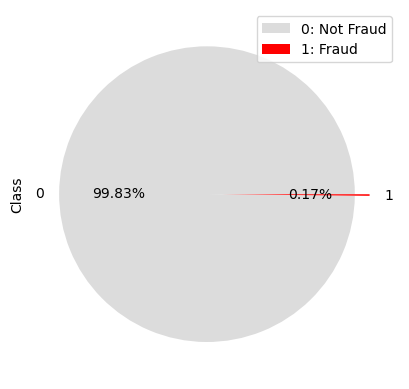

In [20]:
df['Class'].value_counts().plot(kind='pie', autopct="%.2f%%", explode= (0.05, 0.05), colors = ['#DCDCDC', 'red'], legend=True)
plt.legend(["0: Not Fraud","1: Fraud"]);

Note: There is a class imbalance.

### 4. Data Pre-processing

#### 4.1. Handling Skewed Distribution

#### 4.1.1. Features Scaling

Features in a dataset often have different scales, which can affect the performance of certain machine learning algorithms. 

Scaling techniques such as standardization (Z-score normalization), min-max scaling, or robust scaling ensure that features are on a similar scale, improving the performance and convergence of algorithms.

Both RobustScaler and MaxAbsScaler are scaling techniques that can handle outliers in the data, but they have different approaches and properties. Here are some considerations for choosing between RobustScaler and MaxAbsScaler:
- RobustScaler is preferred when dealing with datasets that contain outliers or skewed distributions. It provides robust scaling results by using median and IQR statistics.
- MaxAbsScaler is suitable when preserving the relative relationships between features is important, and the presence of outliers is not a major concern. It scales features based on their maximum absolute values, making it less sensitive to outliers.

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

In [22]:
rob_scaler = RobustScaler()

df_scaled = df.copy()

df_scaled['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df_scaled['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

X_scaled = df_scaled[features]
y_scaled = df_scaled['Class']

#### 4.2. Handling Outliers

#### 4.2.1. Box and Whisker Plot

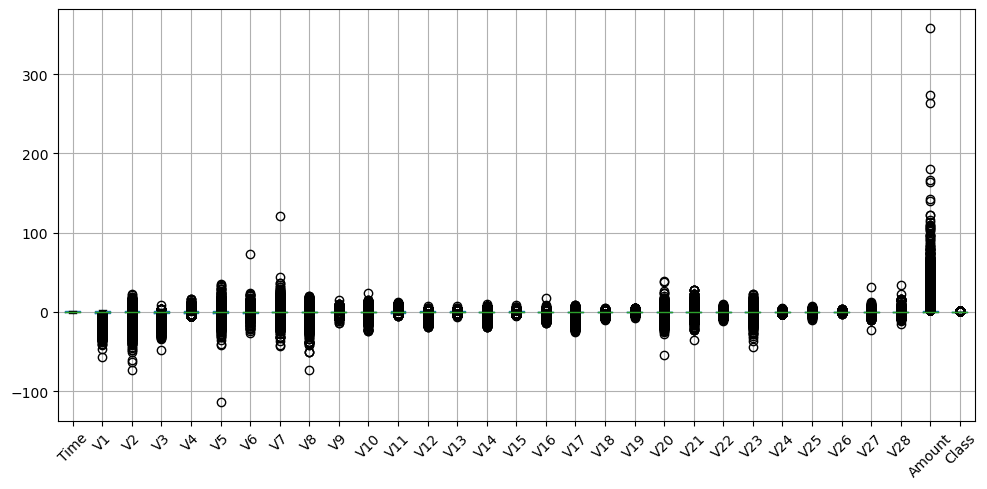

In [32]:
plt.figure(figsize=(10, 5))
df_scaled.boxplot()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()

In [24]:
# WIP

#### 4.3. Handling Class Imbalance with Resampling

#### Sampling Methods 

In [25]:
# WIP

#### 4.3.1. Oversampling Techniques

It involves increasing the number of instances in the minority class to balance the class distribution. 

Some common oversampling techniques include: random oversampling, SMOTE, Borderline SMOTE, and ADASYN.

Oversampling might cause a decrease in metric score due to overfitting, noise in synthetic samples, imbalance in synthesized samples, and class overlap.

#### 4.3.2. Undersampling Techniques

It involves reducing the number of instances in the majority class to balance the class distribution. 

Some common undersampling techniques include: random undersampling, CNN, NearMiss, Tomek Links, ENN, OSS, and NCR.

Undersampling might cause a decrease in metric score due to loss of information, bias towards minority class, and reduced training data.

#### 4.3.3. Combined Techniques

Outliers can significantly affect the performance of machine learning models, especially those sensitive to data distribution. 

Instead of removing outliers outright, consider robust resampling techniques that are less affected by outliers. 

Robust resampling techniques like SMOTE and Tomek links or SMOTE and ENN can help address outliers while balancing class distribution.

In [26]:
# WIP

### 5. Data Modelling

In [27]:
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, auc

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [29]:
# Let us use the imbalance ratio to set the class weight. 
# Since there is ~1% of samples from the minority class, the imbalance ratio IR is:
IR = 0.0172/(1-0.0172) 

# Initialize XGBoost classifier
# Use hyperparameters from the Bayesian optimization with cross-validation result
base_model = xgb.XGBClassifier(learning_rate = 0.4017811863875148, 
                               max_depth = 6, 
                               n_estimators = 574, 
                               scale_pos_weight=1/IR,
                               random_state=42)
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=10, random_state=42)

# Train the model
bagging_model.fit(X_train, y_train)
    
# Make predictions
y_pred = bagging_model.predict(X_test)

In [30]:
def visualize_auprc(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    auprc = auc(recall, precision)
    
    plt.figure(figsize=(4, 3))
    plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()

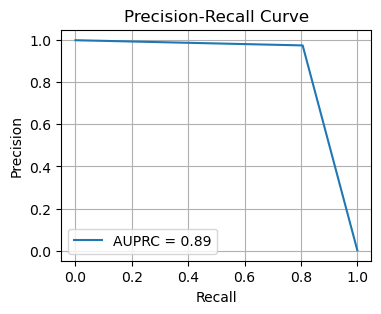

In [31]:
visualize_auprc(y_test, y_pred)